In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import kpss

In [ ]:
url = 'https://raw.githubusercontent.com/omarmendoza564/datos/main/datos/data_nybirths.dat'
df_births = pd.read_csv(url, header=None, names=['Births'])
df_births

,Births
0,26.663
1,23.598
2,26.931
3,24.740
4,25.806
...,...
163,30.000
164,29.261
165,29.012
166,26.992


In [ ]:
df_births.index = pd.date_range(start='1946-01', periods=len(df_births), freq='ME')
df_births

,Births
1946-01-31,26.663
1946-02-28,23.598
1946-03-31,26.931
1946-04-30,24.740
1946-05-31,25.806
...,...
1959-08-31,30.000
1959-09-30,29.261
1959-10-31,29.012
1959-11-30,26.992


<Figure size 300x1500 with 0 Axes>

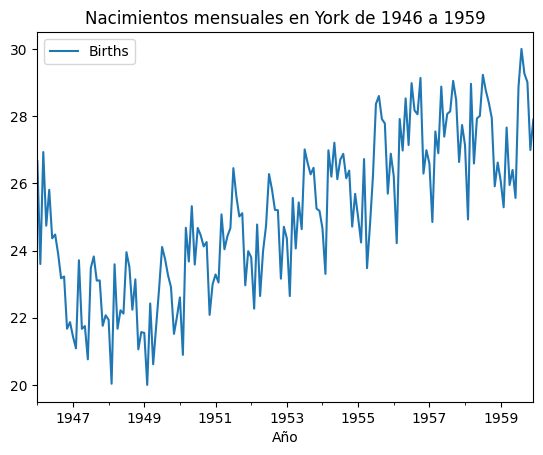

In [ ]:

plt.figure(figsize=(3,15))
df_births.plot()
plt.xlabel("Año")
plt.title("Nacimientos mensuales en York de 1946 a 1959")
plt.show()

In [ ]:
df_births["Month"]=df_births.index.month
df_births
#26 nacimientos en enero

,Births,Month
1946-01-31,26.663,1
1946-02-28,23.598,2
1946-03-31,26.931,3
1946-04-30,24.740,4
1946-05-31,25.806,5
...,...,...
1959-08-31,30.000,8
1959-09-30,29.261,9
1959-10-31,29.012,10
1959-11-30,26.992,11


<Figure size 1200x800 with 0 Axes>

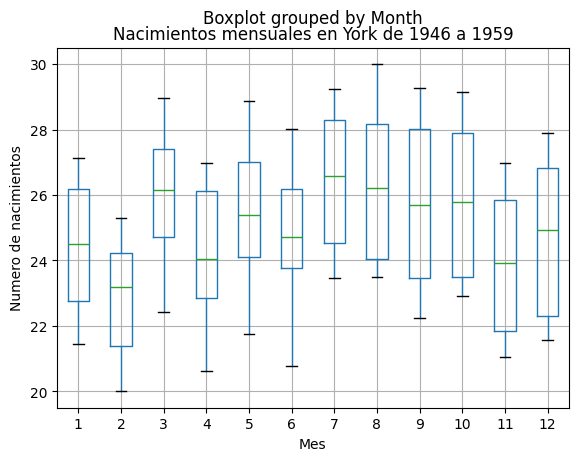

In [ ]:
df_births["Month"]=df_births.index.month
plt.figure(figsize=(12,8))
df_births.boxplot(column="Births", by="Month")
plt.xlabel("Mes")
plt.ylabel("Numero de nacimientos")
plt.title("Nacimientos mensuales en York de 1946 a 1959")
plt.show()

In [ ]:
df_births[df_births["Month"]==1]

,Births,Month
1946-01-31,26.663,1
1947-01-31,21.439,1
1948-01-31,21.937,1
1949-01-31,21.548,1
1950-01-31,22.604,1
1951-01-31,23.287,1
1952-01-31,23.798,1
1953-01-31,24.364,1
1954-01-31,24.657,1
1955-01-31,24.990,1


<Figure size 1200x800 with 0 Axes>

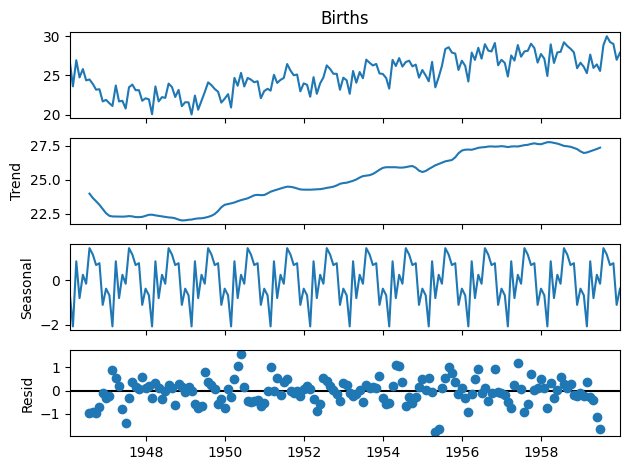

In [ ]:
plt.figure(figsize=(12,8))
decomposition = seasonal_decompose(df_births["Births"], model="additive", period=12)
decomposition.plot()
plt.show()

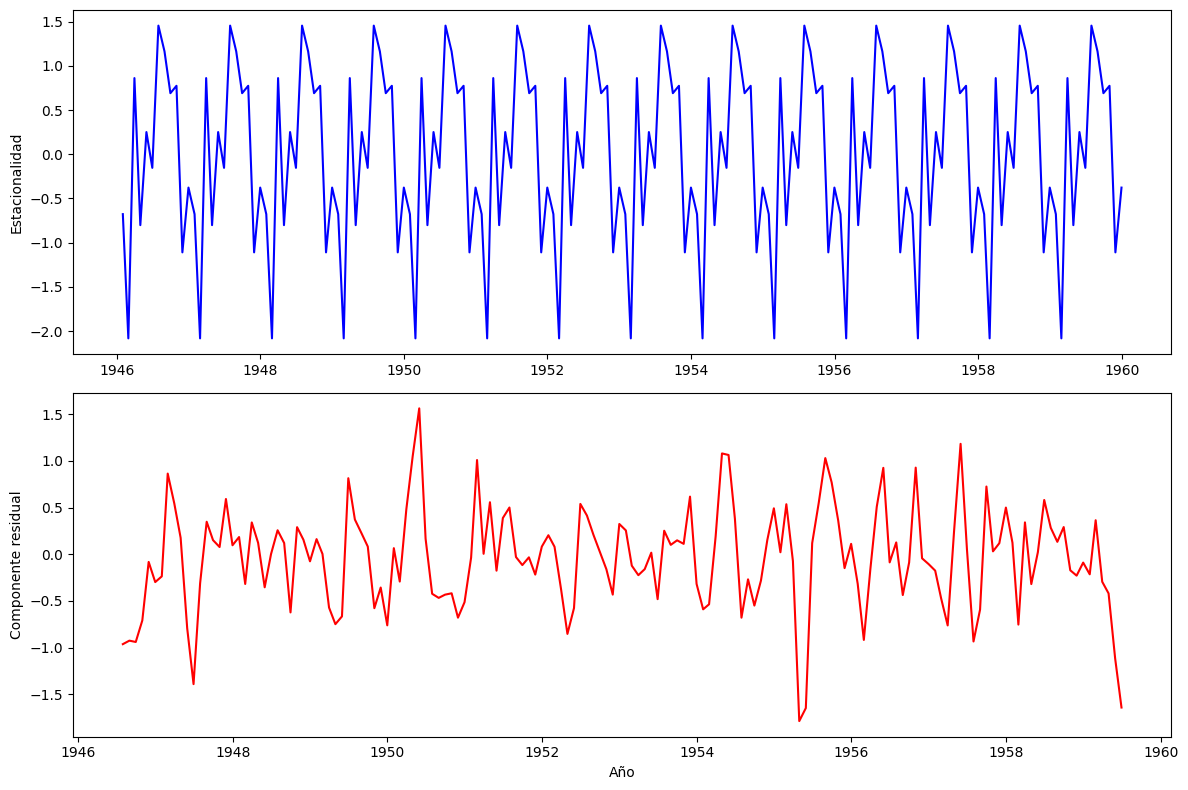

In [ ]:
#Si quiero usar ARIME(Metodo de regresion) mis valores deberan de tener comportamientos
#estacionarios o que de cierta forma se repitan como en los meses

#Componente residual = valores que se salen de la media, pueden en este caso explicarse
#por algun evento que aumente o disminuya los nacimientos
plt.figure(figsize=(12,8))
plt.subplot(211)
plt.plot(decomposition.seasonal, color="Blue")
plt.ylabel("Estacionalidad")
plt.subplot(212)
plt.plot(decomposition.resid, color="Red")
plt.ylabel("Componente residual")
plt.xlabel("Año")
plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import kpss
#Prueba de estacioneridad

birth_series = df_births["Births"]
statistics, p_value, lags, critical_values = kpss(birth_series, regression='c', nlags="auto")
print(f"statistics: {statistics}")
print(f"p_value: {p_value}")
print(f"lags: {lags}")
print(f"critical_values: {critical_values}")

if(p_value < 0.5):
  print("La serie no es estacionaria")
else:
  print("La serie es estacionaria")

statistics: 1.6923193126540295
p_value: 0.01
lags: 8
critical_values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
La serie no es estacionaria


<ipython-input-10-eddeead64623>:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistics, p_value, lags, critical_values = kpss(birth_series, regression='c', nlags="auto")


In [ ]:
birth_series_diff = birth_series.diff().dropna()

statistics_diff, p_value_diff, lags_diff, critical_values_diff = kpss(birth_series_diff, regression='c', nlags="auto")
print(f"statistics: {statistics_diff}")
print(f"p_value: {p_value_diff}")
print(f"lags: {lags_diff}")
print(f"critical_values: {critical_values_diff}")

if(p_value_diff < 0.5):
  print("La serie diff no es estacionaria")
else:
  print("La serie diff es estacionaria")

statistics: 0.09976295466341327
p_value: 0.1
lags: 7
critical_values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
La serie diff no es estacionaria


<ipython-input-11-c978622c6952>:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistics_diff, p_value_diff, lags_diff, critical_values_diff = kpss(birth_series_diff, regression='c', nlags="auto")


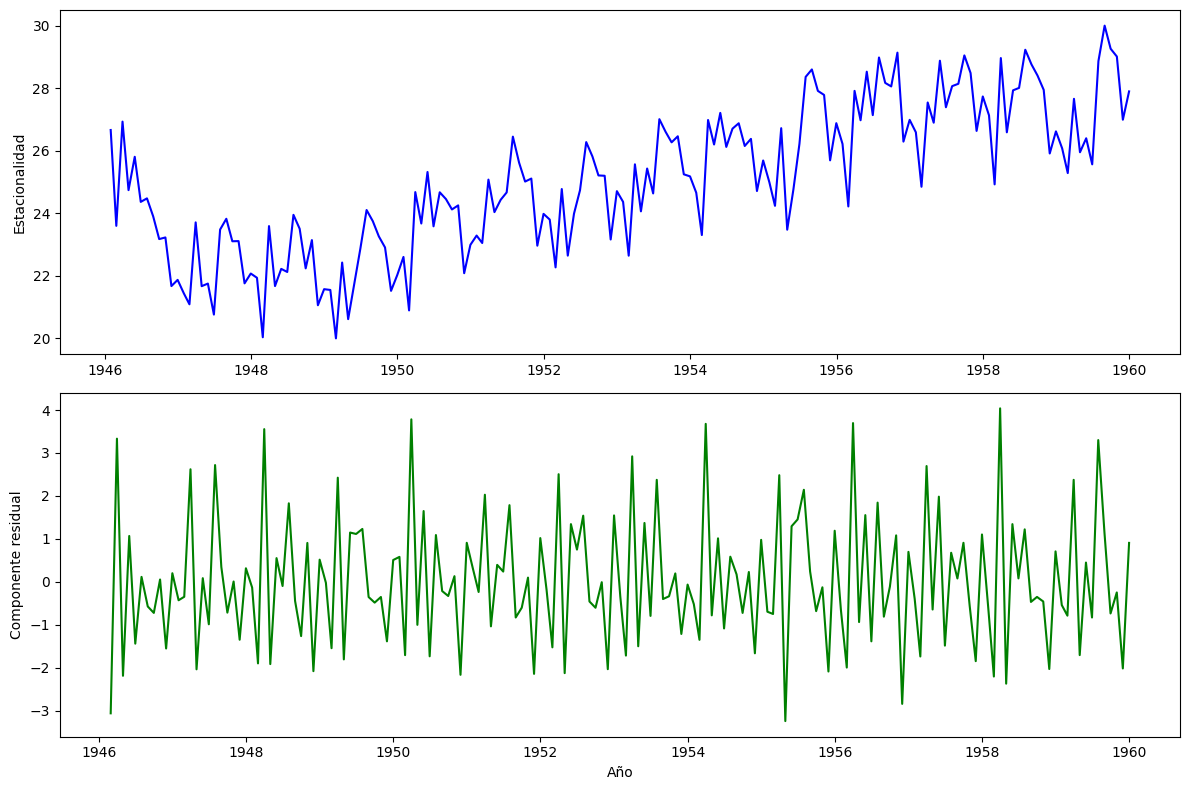

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(211)
plt.plot(birth_series, color="Blue")
plt.ylabel("Estacionalidad")
plt.subplot(212)
plt.plot(birth_series_diff, color="Green")
plt.ylabel("Componente residual")
plt.xlabel("Año")
plt.tight_layout()
plt.show()

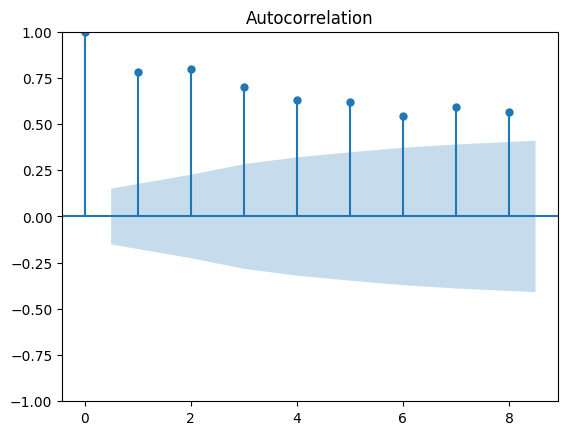

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(birth_series, lags=8)
plt.show()

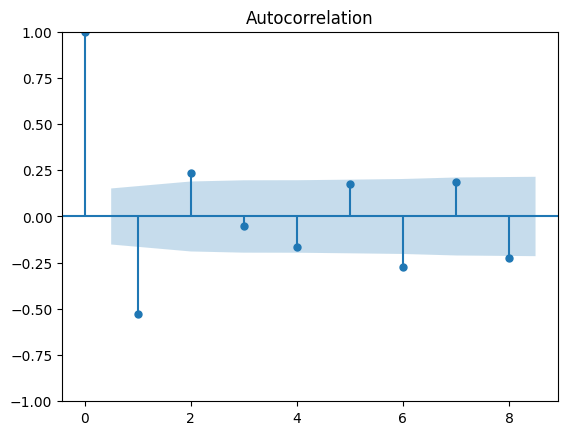

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(birth_series_diff, lags=8)
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.tools import diff
#Ajustar una serie de tiempo por el componnete de esatcionalidad

#Se resta el componente estacional de la serie y se calcula el diferencial
births_ts = pd.Series(df_births['Births'].values, index=pd.date_range('1946-01-01',periods=len(df_births), freq='M'))

decomposition = seasonal_decompose(births_ts, model='additive')

#Ajustar el componente estacional
seasonility_adjusted = births_ts - decomposition.seasonal

#Diferencir la serie ajustada estacionalmente para hacerla estacionaria
stationary_serie = diff(seasonility_adjusted, k_diff=1)

<ipython-input-15-839db0dc7d8b>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  births_ts = pd.Series(df_births['Births'].values, index=pd.date_range('1946-01-01',periods=len(df_births), freq='M'))


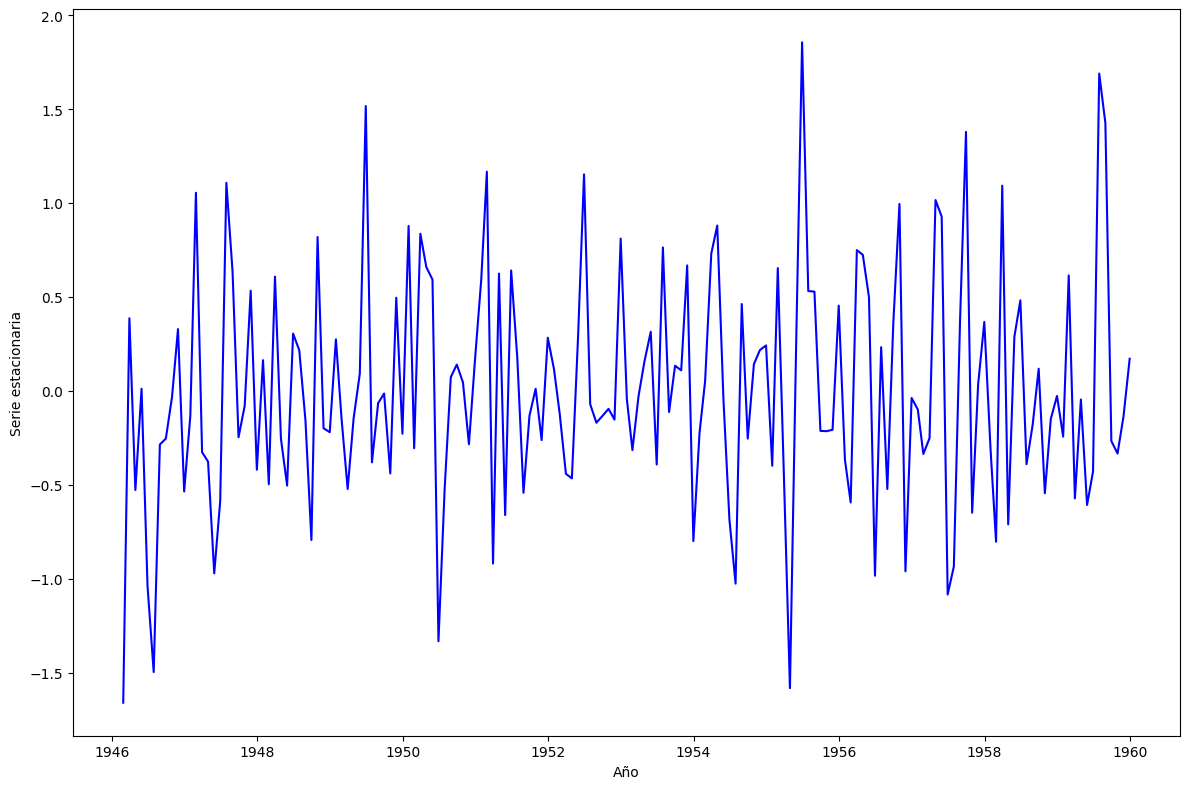

In [ ]:
#Graficra la serie esatcionaria
plt.figure(figsize=(12, 8))
plt.plot(stationary_serie, color="blue")
plt.ylabel("Serie estacionaria")
plt.xlabel("Año")
plt.tight_layout()
plt.show()

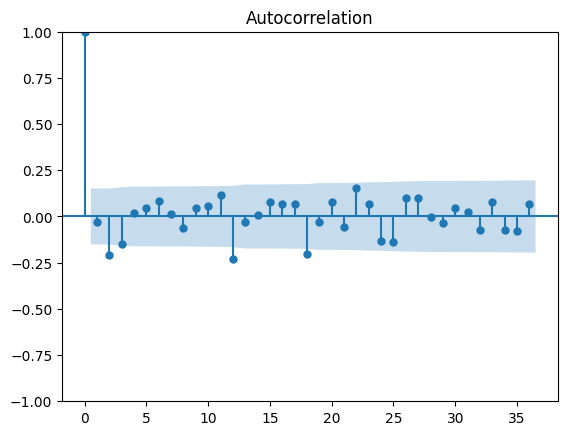

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(stationary_serie.dropna(), lags=36)
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
#p Autoregresivo, Cuantos valores anteriores se usan para predecir
#d integrado, grado de diferencia de la serie para hacerla estacionaria
#q Media Móvil, Númera de errores pasados para predecir el vaor actual

model = ARIMA(stationary_serie, order=(1, 1, 1))
fitARIMA = model.fit()
print(fitARIMA.summary())

#Log likelihood verosimilitud entre mas cercano a 0 o positivo mejor se ajusta al modelo
#AIC medida de calidad del modelo es preferible un valor cercano a 0
#ar.Li Coeficiente del término AR 5% es estadisticamente significarivo
#ma.Li coeficiente del término MA si p-values es 0 indica que el coeficiente es significativo
#Varianza en terminos del error

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  167
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -158.709
Date:                Tue, 19 Nov 2024   AIC                            323.419
Time:                        16:45:44   BIC                            332.755
Sample:                    02-28-1946   HQIC                           327.208
                         - 12-31-1959                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0286      0.079     -0.362      0.717      -0.183       0.126
ma.L1         -0.9937      0.048    -20.822      0.000      -1.087      -0.900
sigma2         0.3861      0.040      9.673      0.0

In [ ]:
#predecir los valores futuros
nperiodos = 12
forecasted_values = fitARIMA.get_forecast(steps=nperiodos)

#obtener la media de las predicciones
predicted_mean = forecasted_values.predicted_mean

#Obtener los intervalos de confianza de las predicciones
conf_int = forecasted_values.conf_int()

print("Predicciones")
print(predicted_mean)

print("intervalos de confianza")
print(conf_int)

Predicciones
1960-01-31    0.006769
1960-02-29    0.011497
1960-03-31    0.011362
1960-04-30    0.011366
1960-05-31    0.011366
1960-06-30    0.011366
1960-07-31    0.011366
1960-08-31    0.011366
1960-09-30    0.011366
1960-10-31    0.011366
1960-11-30    0.011366
1960-12-31    0.011366
Freq: ME, Name: predicted_mean, dtype: float64
intervalos de confianza
             lower y   upper y
1960-01-31 -1.212148  1.225686
1960-02-29 -1.207663  1.230657
1960-03-31 -1.207829  1.230553
1960-04-30 -1.207848  1.230579
1960-05-31 -1.207871  1.230602
1960-06-30 -1.207894  1.230625
1960-07-31 -1.207917  1.230648
1960-08-31 -1.207940  1.230671
1960-09-30 -1.207963  1.230694
1960-10-31 -1.207986  1.230717
1960-11-30 -1.208009  1.230740
1960-12-31 -1.208032  1.230763


In [ ]:
#Mostart los vaores predichos en el nivel original
last_value = births_ts.iloc[-1]

#revertir la diferenciación
prediction_csum = predicted_mean.cumsum()
prediction_level = last_value + prediction_csum
print("Valores predichos")
print(prediction_level)

#Revertir la diferenciación de los intervalos de confianza
lower_bound = conf_int.iloc[:,0].cumsum() + last_value
upper_bound = conf_int.iloc[:, 1].cumsum() + last_value

#crear un DF con los intervalos en valor real
conf_int_ori = pd.concat([lower_bound, upper_bound], axis=1)
conf_int_ori.columns = [["lower_bound", "upper_bound"]]
print("Intervalo de confianza")
print(conf_int_ori)


Valores predichos
1960-01-31    27.903769
1960-02-29    27.915266
1960-03-31    27.926628
1960-04-30    27.937994
1960-05-31    27.949360
1960-06-30    27.960725
1960-07-31    27.972091
1960-08-31    27.983457
1960-09-30    27.994822
1960-10-31    28.006188
1960-11-30    28.017554
1960-12-31    28.028920
Freq: ME, Name: predicted_mean, dtype: float64
Intervalo de confianza
           lower_bound upper_bound
1960-01-31   26.684852   29.122686
1960-02-29   25.477190   30.353343
1960-03-31   24.269361   31.583896
1960-04-30   23.061513   32.814475
1960-05-31   21.853642   34.045078
1960-06-30   20.645748   35.275703
1960-07-31   19.437831   36.506351
1960-08-31   18.229891   37.737023
1960-09-30   17.021928   38.967717
1960-10-31   15.813942   40.198434
1960-11-30   14.605933   41.429175
1960-12-31   13.397901   42.659938


In [ ]:
conf_int_ori.reset_index(drop=True, inplace=True)

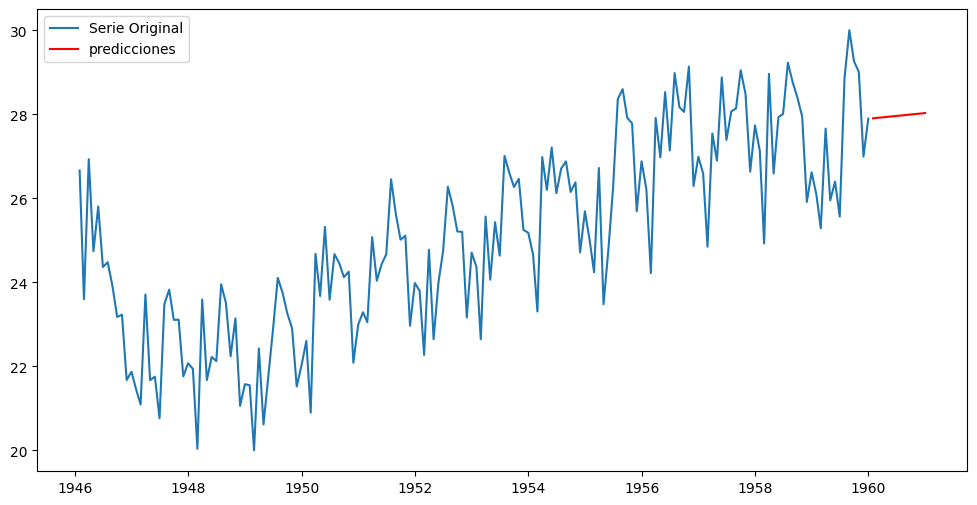

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(births_ts, label="Serie Original")
plt.plot(prediction_level.index, prediction_level, label="predicciones", color="r")
#plt.fill_between(conf_int_ori.index, conf_int_ori[['lower_bound']], conf_int_ori['upper_bound'], color='pink', alpha=0.3)
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_sarimax = SARIMAX(births_ts, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
fitSARIMAX = model_sarimax.fit()

#predecir
forcasted_sarima = fitSARIMAX.get_forecast(steps=nperiodos)
predicted_mean_sarima = forcasted_sarima.predicted_mean
conf_int_sarima = forcasted_sarima.conf_int()

print("predicciones sarima")
print(predicted_mean_sarima)

print("intervalos de confianza sarima")
print(conf_int_sarima)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


predicciones sarima
1960-01-31    27.575451
1960-02-29    25.914353
1960-03-31    29.079898
1960-04-30    27.436358
1960-05-31    28.730310
1960-06-30    28.351991
1960-07-31    29.643684
1960-08-31    29.236829
1960-09-30    28.898082
1960-10-31    28.983691
1960-11-30    27.065995
1960-12-31    27.848724
Freq: ME, Name: predicted_mean, dtype: float64
intervalos de confianza sarima
              lower y    upper y
1960-01-31  26.323090  28.827812
1960-02-29  24.284943  27.543764
1960-03-31  27.207862  30.951934
1960-04-30  25.379610  29.493105
1960-05-31  26.519270  30.941351
1960-06-30  26.004693  30.699289
1960-07-31  27.171882  32.115486
1960-08-31  26.648820  31.824839
1960-09-30  26.200130  31.596033
1960-10-31  26.180792  31.786590
1960-11-30  24.162295  29.969694
1960-12-31  24.847770  30.849678


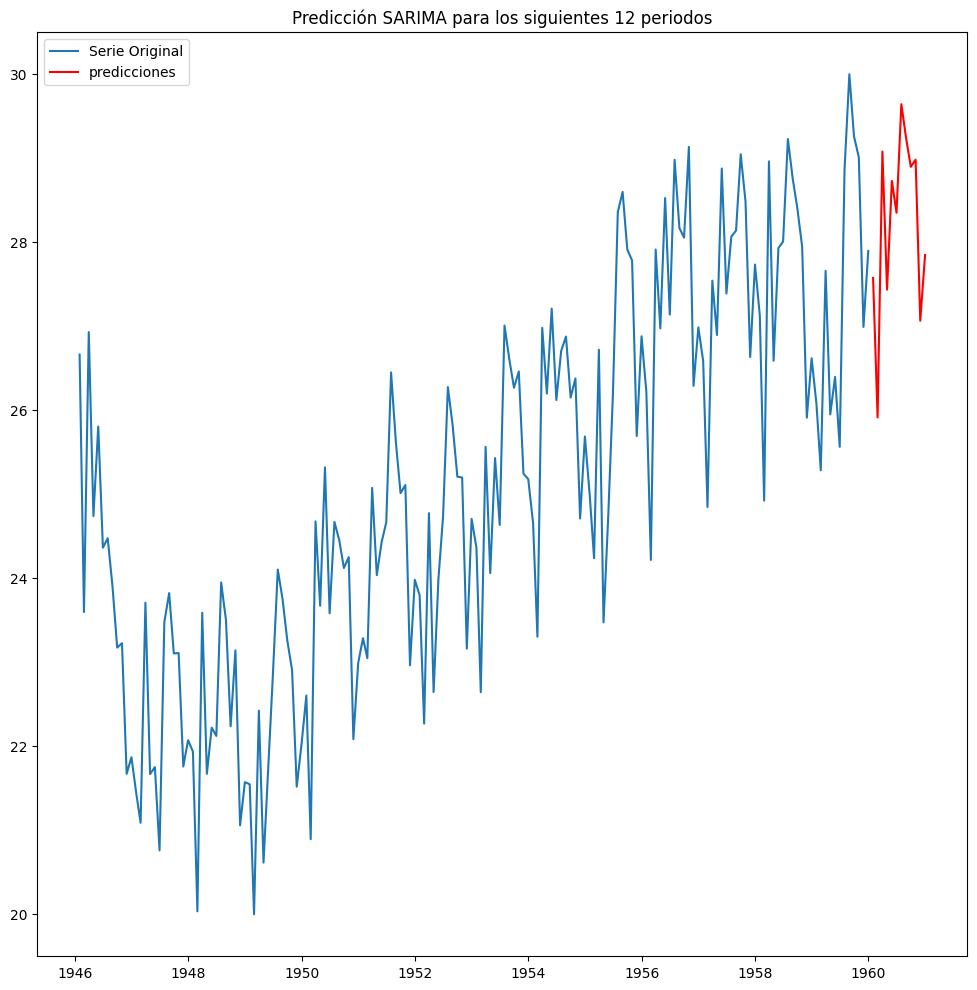

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(births_ts, label="Serie Original")
plt.plot(predicted_mean_sarima, label="predicciones", color="r")
#plt.fill_between(conf_int_ori.index, conf_int_ori[['lower_bound']], conf_int_ori['upper_bound'], color='pink', alpha=0.3)
plt.title(f"Predicción SARIMA para los siguientes {nperiodos} periodos")
plt.legend()
plt.show()